In [47]:
import healpy as hp
import numpy as np
import pickle
import h5py
import altair as alt
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
cd ..

/global/u2/z/zonca/p/software/s4mapbasedsims/202006_foregrounds_extragalactic_cmb_tophat


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
nside=512

In [5]:
s4 = h5py.File("cmbs4_tophat.h5", mode='r', track_order=True)

In [6]:
channels = [ch for ch in s4.keys() if "S" in ch]

In [7]:
freqs = [s4[ch].attrs["center_frequency_GHz"] for ch in channels]

In [8]:
print(freqs)

[220.0, 270.0, 30.0, 40.0, 95.0, 155.1, 85.0, 145.1]


In [9]:
# sort by frequency
channels = [x for _,x in sorted(zip(freqs,channels))]

In [10]:
print(channels)

['LFS1', 'LFS2', 'MFLS1', 'MFHS1', 'MFLS2', 'MFHS2', 'HFS1', 'HFS2']


In [11]:
alt.data_transformers.enable("default")

DataTransformerRegistry.enable('default')

In [12]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [13]:
import pysm3 as pysm
import so_pysm_models

from pysm3 import units as u

In [14]:
import mapsims

In [15]:
selection = {}
cl = {}
i_pol = 0

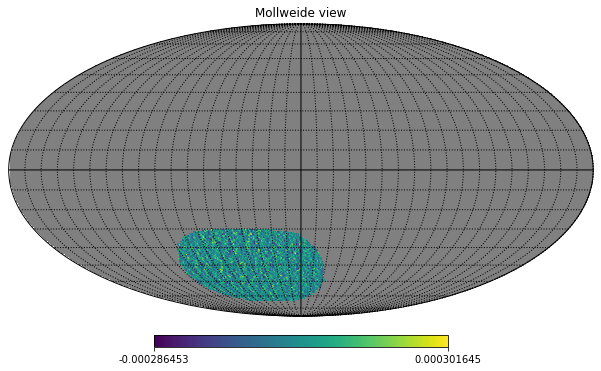

In [23]:
hp.mollview(m)
hp.graticule(dpar=10,dmer=10)

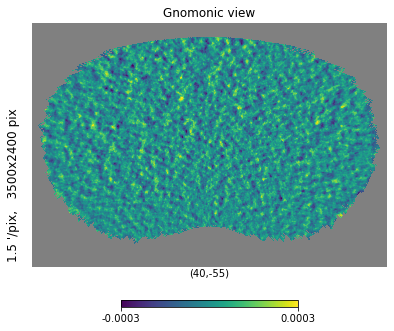

In [36]:
scale = 3e-4
hp.gnomview(m, rot=(40,-55), xsize=3500, ysize=2400, min=-scale, max=scale)

In [39]:
ls output/512/combined_foregrounds/0000/

cmbs4_combined_foregrounds_uKCMB_SAT-HFS1_nside512_0000.fits
cmbs4_combined_foregrounds_uKCMB_SAT-HFS2_nside512_0000.fits
cmbs4_combined_foregrounds_uKCMB_SAT-LFS1_nside512_0000.fits
cmbs4_combined_foregrounds_uKCMB_SAT-LFS2_nside512_0000.fits
cmbs4_combined_foregrounds_uKCMB_SAT-MFHS1_nside512_0000.fits
cmbs4_combined_foregrounds_uKCMB_SAT-MFHS2_nside512_0000.fits
cmbs4_combined_foregrounds_uKCMB_SAT-MFLS1_nside512_0000.fits
cmbs4_combined_foregrounds_uKCMB_SAT-MFLS2_nside512_0000.fits


combined_foregrounds
LFS1
LFS2
MFLS1
MFHS1
MFLS2
MFHS2
HFS1
HFS2


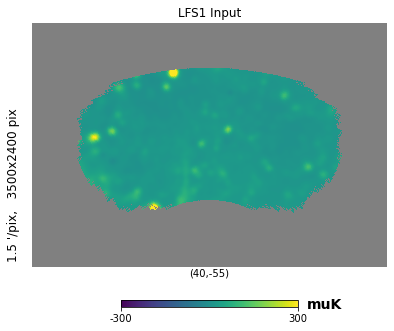

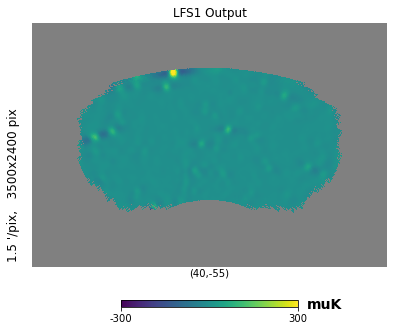

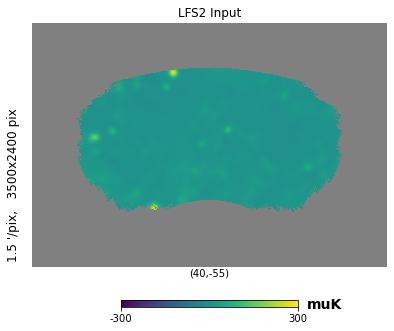

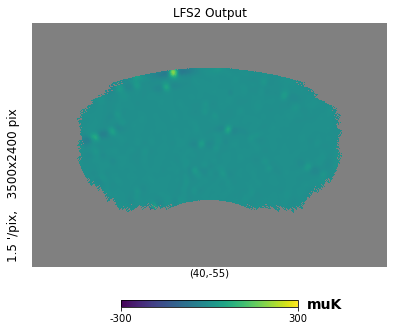

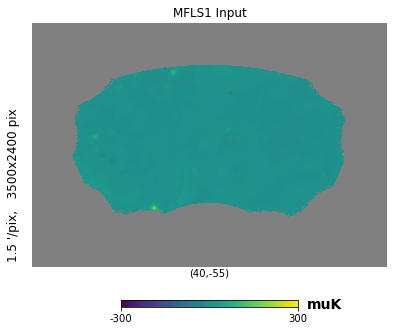

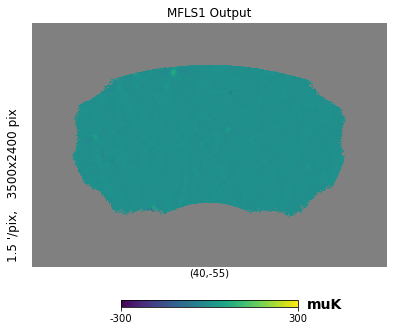

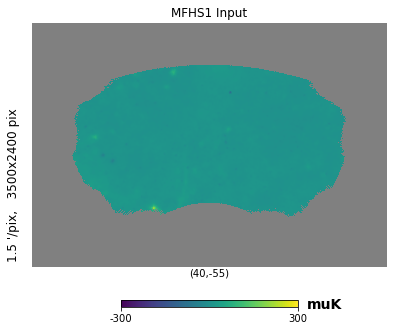

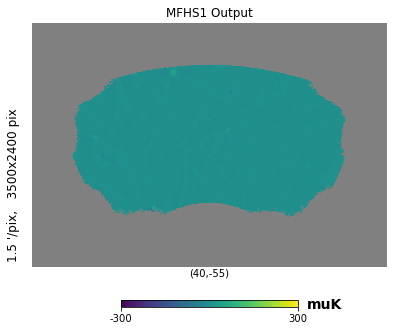

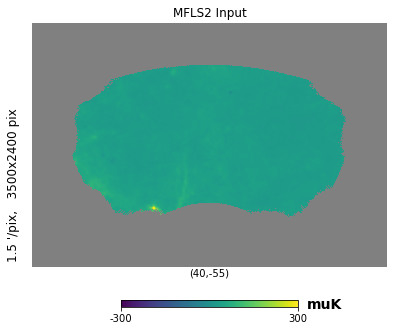

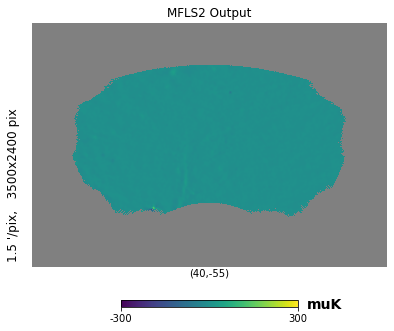

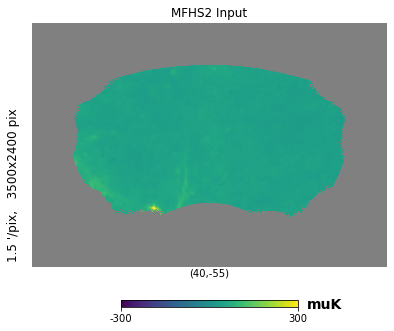

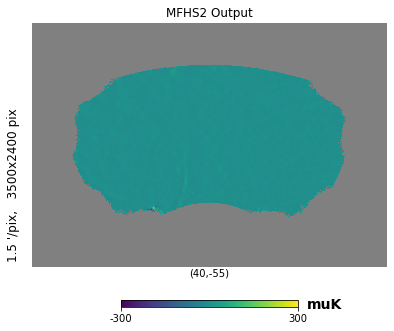

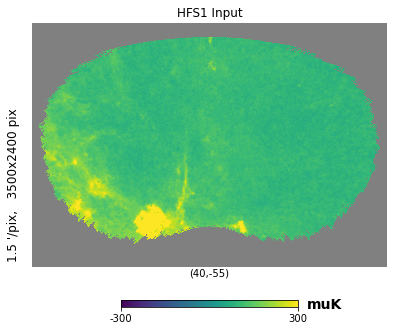

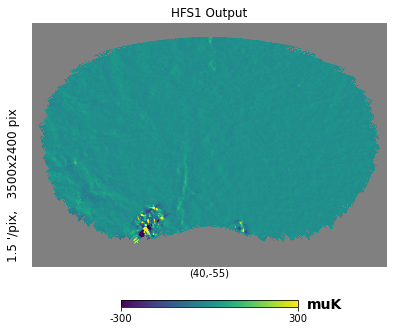

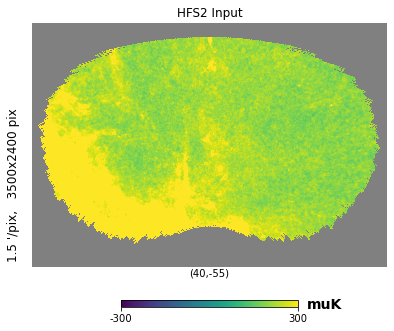

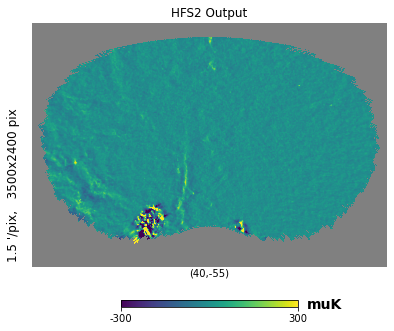

In [57]:
component = "combined_foregrounds"
print(component)

for ch in channels:
    print(ch)
    m = hp.ma(hp.read_map(
   "../202006_reference_design/output/s4_reference_design_foregrounds/" + \
        f"SAT-{ch}_pole/cmbs4_KCMB_SAT-{ch}_pole_nside512_1_of_1.fits"))
    m_input = hp.ma(hp.read_map(
        f"output/512/combined_foregrounds/0000/cmbs4_combined_foregrounds_uKCMB_SAT-{ch}_nside512_0000.fits"))
    m_input.mask = m.mask
    scale = 3e-1*1e3
    hp.gnomview(m_input, rot=(40,-55), xsize=3500, ysize=2400, min=-scale, max=scale, unit="muK", title=f"{ch} Input")
    plt.savefig(f"foreground_map_{ch}_input.png")
    hp.gnomview(m*1e6, rot=(40,-55), xsize=3500, ysize=2400, min=-scale, max=scale, unit="muK", title=f"{ch} Output")
    plt.savefig(f"foreground_map_{ch}_output.png")

combined_foregrounds
LFS1
LFS2
MFLS1
MFHS1
MFLS2
MFHS2
HFS1
HFS2


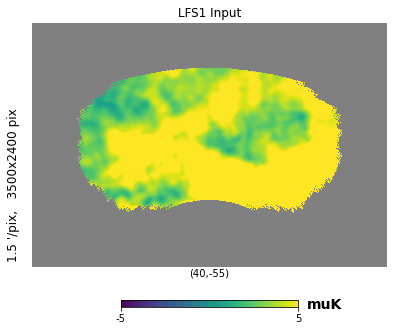

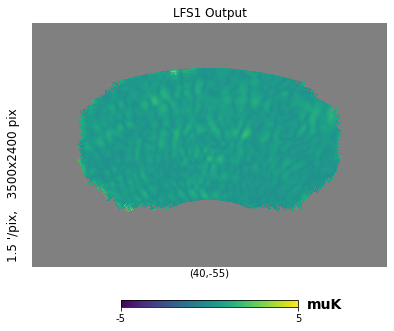

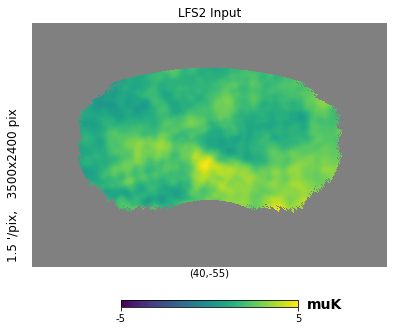

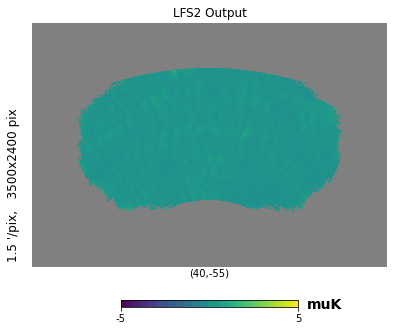

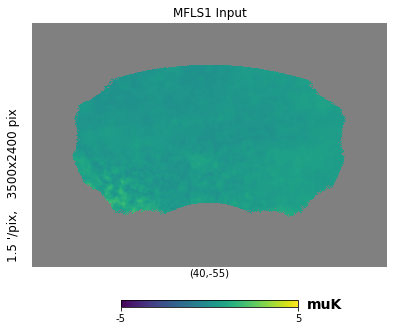

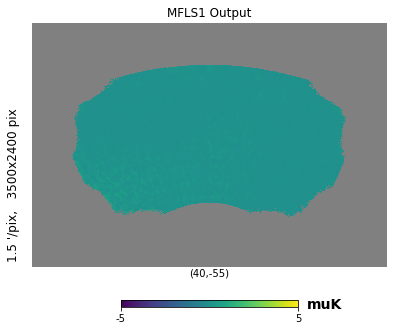

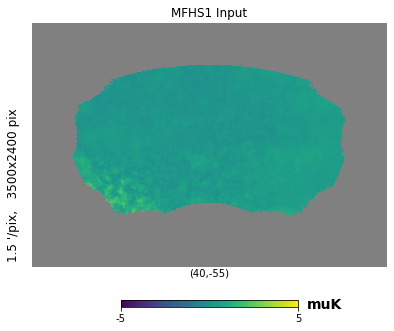

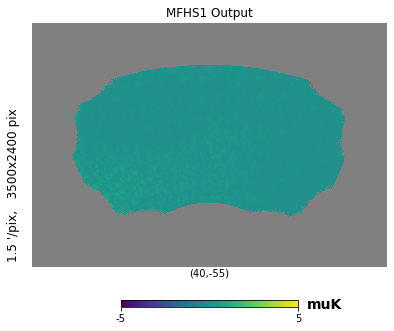

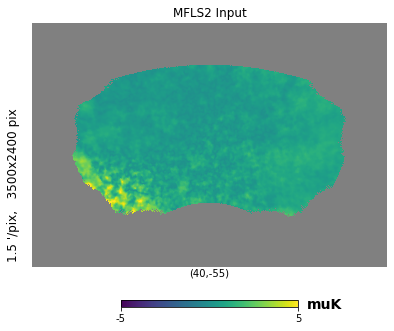

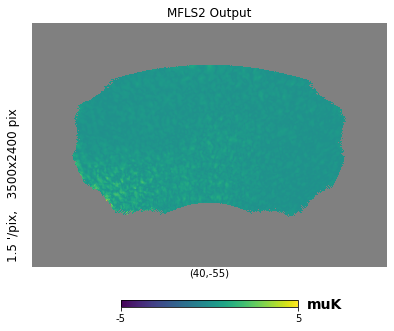

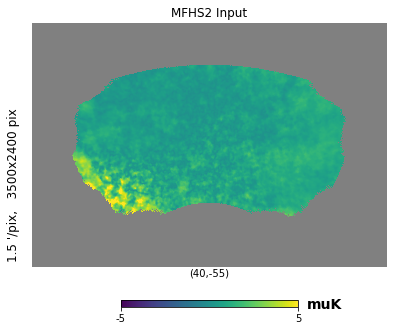

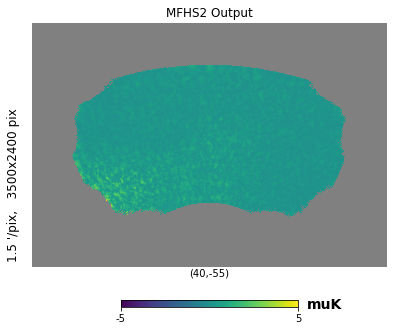

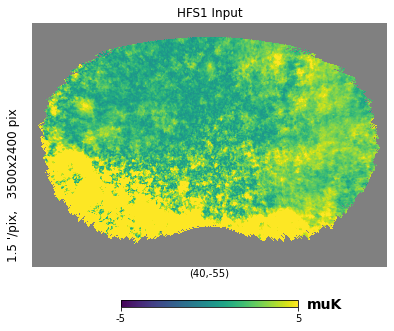

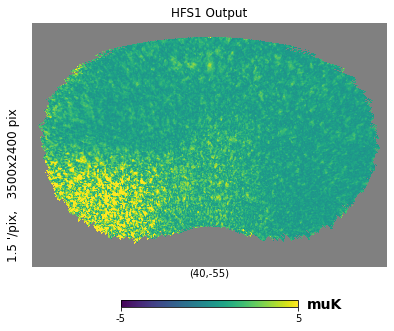

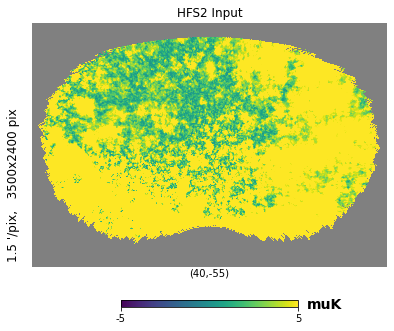

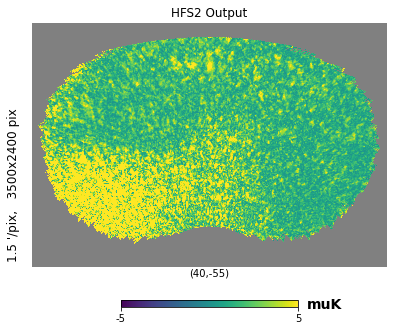

In [56]:
component = "combined_foregrounds"
print(component)

for ch in channels:
    print(ch)
    mm = hp.ma(hp.read_map(
   "../202006_reference_design/output/s4_reference_design_foregrounds/" + \
        f"SAT-{ch}_pole/cmbs4_KCMB_SAT-{ch}_pole_nside512_1_of_1.fits", (1,2)))
    m = np.sqrt(mm[0]**2+mm[1]**2)
    mm_input = hp.ma(hp.read_map(
        f"output/512/combined_foregrounds/0000/cmbs4_combined_foregrounds_uKCMB_SAT-{ch}_nside512_0000.fits", (1,2)))
    m_input = np.sqrt(mm_input[0]**2+mm_input[1]**2)  
    m_input.mask = m.mask
    scale = .5e-2*1e3
    hp.gnomview(m_input, rot=(40,-55), xsize=3500, ysize=2400, min=-scale, max=scale, unit="muK", title=f"{ch} Input")
    plt.savefig(f"foreground_map_P_{ch}_input.png")
    hp.gnomview(m*1e6, rot=(40,-55), xsize=3500, ysize=2400, min=-scale, max=scale, unit="muK", title=f"{ch} Output")
    plt.savefig(f"foreground_map_P_{ch}_output.png")